In [3]:
# pip install fastai


In [1]:
# pip install torchvision


In [3]:
 # pip install matplotlib

In [124]:
from fastai.vision.all import *
import os
import shutil
import time 
import PIL 
import random

In [ ]:
def data_augmentation(data_dir, target=1000):
    """
        Проводит аугментацию данных и примерно выравнивает дисбалансы в размерах классов.
        Фотографии из изначального датасета копируются в датасет с именем 'изначальное имя датасета'+'_aug'
        Копия каждой фотографии кропится (уменьшается наибольшая сторна на произвольное значене функцией crop() ). 
        Создается несколько версий фотографии повернутой на случайный градус функцией rotate() 
    Args:
        data_dir (str): Путь к директории с данными. Данные должны быть разделены на train и val и разложены в папки с названиями классов.
        target (int(optional)): Целевой размер класса. По умолчанию 1000
    
    Return:    
        Возвращяет название папки, в которую сложил датасет с аугментациями
    """


    
        # Проходим по папкам классов в директории data_dir
    aug_dir=data_dir+'_aug'
    os.makedirs(aug_dir, exist_ok=True) # создаем папку в которую сложим датасет с аугментациями
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        aug_class_path= os.path.join(aug_dir, class_name)
        os.makedirs(aug_class_path, exist_ok=True) # создаем папку c классом внутри папки aug_dir
        # Проверяем что это папка
        if os.path.isdir(class_path):
            # Получаем список изображений в папке класса
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
            to_target=round(target/len(images)+0.3) # считаем, во сколько раз мы не дотягиваем до цели 
            for image in images:
                src_path = os.path.join(class_path, image)
                dst_path = os.path.join(aug_class_path, image)

                shutil.copyfile(src_path, dst_path)
                crop(aug_class_path,image)
                for ind in range(1,to_target-1):
                    rotate(aug_class_path,image,ind)
    return(aug_dir)  

In [ ]:
def rotate(file_dir,file_name,ind=1):
    """
        Поварачивает изображение на случайный градус и сохраняет копию файла
    Args:
        file_dir(str): Папка в котой хранится файл,
        file_name(str): Название файла,
        ind (int(optional)): принимает на вход индекс (какой раз подряд мы запускаем функцию). По умолчанию 1 
    
    Return:    
        Возвращяет название папки, в которую сложил датасет с аугментациями
    """

    with Image.open(os.path.join(file_dir,file_name)) as img:
        img.load()
        degree= random.randint((ind-1)*120, (ind)*120)
        rotated_img = img.rotate(degree, expand=True)
        rotated_img.save(os.path.join(file_dir,'rot'+str(ind)+'_'+file_name))


In [ ]:
def crop(file_dir,file_name):
    """
        Отрезает от фотографии (по наибольшей стороне) случайные по размреу полоски, так чтобы фотография стала болеек вадратной, но не обязательно. 
        Обрезанная копия фотографии сохраняется 
    Args:
        file_dir(str): Папка в котой хранится файл,
        file_name(str): Название файла,
        ind (int(optional)): принимает на вход индекс (какой раз подряд мы запускаем функцию). По умолчанию 1 
    
    Return:    
        Возвращяет название папки, в которую сложил датасет с аугментациями
    """

    
    with Image.open(os.path.join(file_dir,file_name)) as img:
        img.load()
        w=img.size[0]
        h=img.size[1]
        max_size=max(img.size)
        min_size=min(img.size)
        img.resize((max_size, max_size))
        new_size=random.randint(min_size,max_size)
        indent= random.randint(0, max_size- new_size)
        if w>h:
            
            cropped_img = img.crop(( indent, 0, indent+ new_size, h))
            cropped_img.save(os.path.join(file_dir,'crop_'+file_name))
        if w<h:
            
            cropped_img = img.crop(( 0,indent, w, indent+ new_size))
            cropped_img.save(os.path.join(file_dir,'crop_'+file_name))
            


In [1]:
def create_dataset(data_dir, train_ratio = 0.8):
    """
    Разделяет данные на обучающую и валидационную выборки и помещает их в папки train и val.
    Если внутри папки с датасетом уже имеются
    
    Args:
        data_dir (str): Путь к директории с данными. Данные должны быть разложены в папки с названиями классов.
        train_ratio (float, optional): Доля данных для обучения. По умолчанию 0.8.
    """


    
    # Папка с тренировочными данными
    train_dir = os.path.join(data_dir, 'train')
    # Папка с валидационными данными
    val_dir = os.path.join(data_dir, 'val')

    #если папка val уже существует - удаляем ее со всем содержимым
    if os.path.isdir( val_dir):
        shutil.rmtree(val_dir)
    #если папка train уже существует - удаляем ее со всем содержимым
    if os.path.isdir( train_dir): 
        shutil.rmtree(train_dir)

    
    # Создаем папки train и val, если их нет
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    
    # Проходим по папкам классов в директории data_dir
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        # Проверяем что это папка
        if os.path.isdir(class_path) and class_name != 'train' and class_name != 'val':
            # Создаем папки классов в train и val
            os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
            os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
            
            # Получаем список изображений в папке класса
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
            # Перемешиваем изображения в папке
            random.shuffle(images)
            
            # Вычисляем сколько изображений в тренировочном наборе
            train_size = int(len(images) * train_ratio)
            
            # Разделяем изображения на тренировочную и валидационную выборки
            train_images = images[:train_size]
            val_images = images[train_size:]
            
            # Копируем изображения в train
            for image in train_images:
                src_path = os.path.join(class_path, image)
                dst_path = os.path.join(train_dir, class_name, image)
                shutil.copyfile(src_path, dst_path)
            
            # Копируем изображения в val
            for image in val_images:
                src_path = os.path.join(class_path, image)
                dst_path = os.path.join(val_dir, class_name, image)
                shutil.copyfile(src_path, dst_path)
            
            print(f"Разделили класс {class_name}, {len(train_images)} в train, {len(val_images)} в val.")

   

    

In [ ]:
def train_resnet50_fastai(data_dir, image_size = 224, batch_size = 32, num_epochs = 10, model_dir = 'models', model_name = 'trained_resnet50.pkl'):
    """
    Дообучает ResNet50 на данных в директории data_dir, сохраняет модель, и возвращает модель(class fastai learner).
    Args:
        data_dir (str): Путь к директории с данными. Данные должны быть разделены на train и val и  разложены в папки с названиями классов.
        image_size (int, optional): Размер изобажения, к которому будут приведены все фотографии при обучении. По умолчанию 224  
        batch_size(int, optional): Размер порции данных, на которые будет разделена выборка. По умолчанию  32
        num_epochs(int, optional): Количество экох обучения.  По умолчанию   10
        model_dir(str, optional):  Папка в которую будет сохранена готовая модель. По умолчанию 'models'
        model_name(str, optional): Имя файла в который будет сохранена обученная модель. По умолчанию 'trained_resnet50.pkl'
   Return:
       Возвращает Обученную модель(class fastai learner).

    
    """

    # 1. Создание DataLoaders
    dls = ImageDataLoaders.from_folder(
        data_dir, # Путь к папке с данными
        train='train', # Имя папки с тренировочными данными
        valid='val', # Имя папки с валидационными данными
        item_tfms=Resize(image_size), # Изменяем размер изображения
        batch_tfms=aug_transforms(size=image_size), # Добавляем аугментацию для обучения
        bs=batch_size, # Размер батча
        )
       
    # 2. Загрузка ResNet50
    learn = vision_learner(dls, resnet50, metrics=accuracy)

    # 3. Дообучение модели
    learn.fine_tune(num_epochs)

    # 4. Сохранение модели
    os.makedirs(os.path.join(model_dir), exist_ok=True) 
    learn.export(os.path.join(model_dir, model_name))
    return learn

 

In [3]:
def evaluate_model(learn, data_dir, image_size = 224):
    """
        Оценивает модель на валидационном датасете и строит confusion matrix
    Args:
        learn (class fastai learner): Обученныя модель.
        data_dir (str): Путь к директории с данными. Данные должны быть разделены на train и val и разложены в папки с названиями классов.
        image_size (int, optional): Размер изобажения, к которому будут приведены все фотографии при обучении. По умолчанию 224  
       
    """
    # Создание DataLoaders
    dls = ImageDataLoaders.from_folder(
        data_dir, # Путь к папке с данными
        train='train', # Имя папки с тренировочными данными
        valid='val', # Имя папки с валидационными данными
        item_tfms=Resize(image_size), # Изменяем размер изображения
        # batch_tfms=aug_transforms(size=image_size), # Добавляем аугментацию для обучения
        bs=32,
        )
    print(dls)
    # Оценка модели
    test_dl = dls.test_dl(get_image_files(os.path.join(data_dir, 'val')), with_labels = True) # Создаем DataLoader для проверки

    interp = ClassificationInterpretation.from_learner(learn, dl = test_dl)
    # Выводим confusion matrix
    interp.plot_confusion_matrix()


In [ ]:
# Функция удаляет нечитаемые картинки в папке
def verify_files(data_dir):
    """
        Проверяет все ли изображения в выбранной папке читаются. Если какие-то файлы с изображениями не читается - удаляет эти файлы
    Args:
        data_dir (str): Путь к директории с данными.
    
    Return:    
        Возвращяет первоначальное количество файлов с изображениями и количество удаленных файлов
    """

    images=get_files(data_dir) # получаем перечень файлов
    failed = verify_images(images) # проверяем файлы и получаем перечень нечитаемых
    failed.map(Path.unlink) # удаляем нечитаемые файлы 
    return(len(images), len(failed))

Проверяем, все ли файлы читаются Всео файлов 5149, из них удалено 0. ушло 16.395704984664917
Аугментация данных Аугментация данных проведена. ушло 118.35277962684631
Проверяем, все ли файлы читаются в папке Russian_birds_Dataset_aug Всео файлов 22316, из них удалено 0. ушло 33.245877742767334
Создаем датасет
Разделили класс 0, 840 в train, 211 в val.
Разделили класс 120, 816 в train, 205 в val.
Разделили класс 160, 826 в train, 207 в val.
Разделили класс 200, 960 в train, 240 в val.
Разделили класс 240, 921 в train, 231 в val.
Разделили класс 280, 838 в train, 210 в val.
Разделили класс 320, 764 в train, 192 в val.
Разделили класс 360, 889 в train, 223 в val.
Разделили класс 40, 764 в train, 192 в val.
Разделили класс 400, 846 в train, 212 в val.
Разделили класс 440, 872 в train, 218 в val.
Разделили класс 480, 806 в train, 202 в val.
Разделили класс 520, 776 в train, 194 в val.
Разделили класс 560, 918 в train, 230 в val.
Разделили класс 600, 938 в train, 235 в val.
Разделили класс 64

epoch,train_loss,valid_loss,accuracy,time
0,0.816225,0.455223,0.855801,44:33


epoch,train_loss,valid_loss,accuracy,time
0,0.306667,0.185802,0.935837,54:38
1,0.231441,0.155934,0.942768,55:07
2,0.195613,0.134373,0.952157,54:46
3,0.149873,0.120545,0.955958,54:37
4,0.105416,0.093927,0.963336,54:32
5,0.077971,0.091265,0.968030,54:37
6,0.054276,0.074665,0.971384,54:40
7,0.045291,0.064776,0.973843,54:41
8,0.043044,0.061975,0.972725,54:38
9,0.030342,0.059997,0.976079,54:44


Модель обучена. Затрачено времени 35500.10240340233
Проверяем модель


C:\ProgramData\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


C:\ProgramData\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Модель проверена. Затрачено времени 733.5333740711212
Модель обучена и сохранена! Всего затрачено времени 36419.018525123596


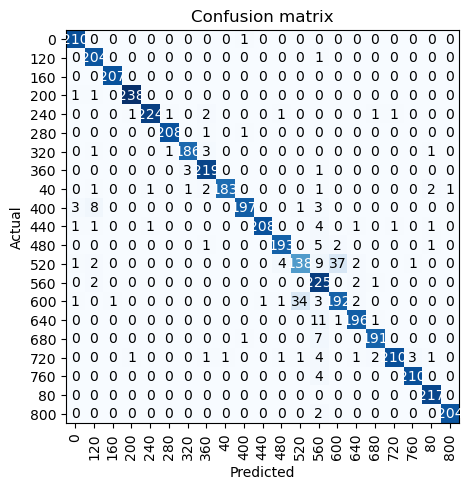

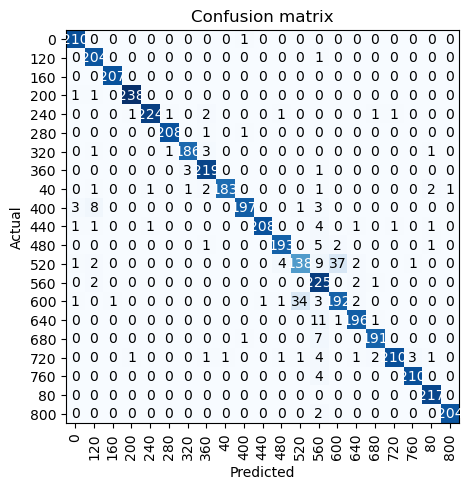

In [144]:
# 1. Установка параметров
data_dir = 'Russian_birds_Dataset'   # Путь к нашим данным
batch_size = 32
image_size = 224
num_epochs = 10
model_dir = './'
model_name = 'russian_birds.pkl'

start = time.time() ## точка отсчета времени

# 2. Проверяем все ли файлы читаются
print(f'Проверяем, все ли файлы читаются',end=" ")
start_ver = time.time()
tot,delited=verify_files(data_dir)
print(f'Всео файлов {tot}, из них удалено {delited}. ушло {time.time()-start_ver}',end="\n")

# 2. Увеличиваем датасет кропом и поворотом на случайные углы имеющихся фотографий
print(f'Аугментация данных',end=" ")
start_aug = time.time()
data_dir=data_augmentation(data_dir, target=1000)
print(f'Аугментация данных проведена. ушло {time.time()-start_aug}',end="\n")

# 3. Повторно проверяем все ли файлы читаются
print(f'Проверяем, все ли файлы читаются в папке {data_dir}',end=" ")
start_ver = time.time()
tot,delited=verify_files(data_dir)
print(f'Всео файлов {tot}, из них удалено {delited}. ушло {time.time()-start_ver}',end="\n")

# 4. Создаем датасет
print(f'Создаем датасет')
create_dataset(data_dir)
print(f'Датасет создан. Затрачено времени {time.time()-start}')

# 5. Обучение модели
print(f'Обучаем модель')
start_learning = time.time() ## точка отсчета времени
learn = train_resnet50_fastai(data_dir, image_size, batch_size, num_epochs, model_dir, model_name)
print(f'Модель обучена. Затрачено времени {time.time()-start_learning}')

# 6. Оценка модели
print(f'Проверяем модель')
start_evaluating = time.time() ## точка отсчета времени
evaluate_model(learn, data_dir, image_size)
print(f'Модель проверена. Затрачено времени {time.time()-start_evaluating}')

print(f'Модель обучена и сохранена! Всего затрачено времени {time.time()-start}')